<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/SoftwareDesign202010_01/SoftwareDesign202010_0103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SoftwareDesign 2020年10月号第一特集 Pythonではじめる統計学

公式のサンプルコードの写経

## 第3章 シミュレーションで学ぶ確率分布


In [1]:
# 基本ライブラリ
import pandas as pd
import numpy as np
import numpy.random as rd
import scipy.stats as st
from tqdm import tqdm
from IPython.display import display

# グラフ描画系
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import seaborn as sns

# plot settings
plt.rcParams["patch.force_edgecolor"] = True
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

%config InlineBackend.figure_format='retina'

In [2]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 2.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=a3f8423a55a36173a6c3f9a6eb6bd1c8cf59a64288ec747a8bd08eeac5e6ef68
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [3]:
import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


### ベルヌーイ分布

* 図２ ベルヌーイ分布のシミュレーション例

In [4]:
# コード7: ベルヌーイ分布に従う試行のシミュレーション
import scipy
from collections import Counter

np.random.seed(71)
n_trial = 10
x = scipy.stats.bernoulli.rvs(p=0.5, size=n_trial)
print(f"10回のベルヌーイ試行の結果：{x}")

cnt = Counter(x)
print(f"表が出た回数{cnt[1]}、裏が出た回数{cnt[0]}")

10回のベルヌーイ試行の結果：[0 0 1 0 1 1 1 1 1 0]
表が出た回数6、裏が出た回数4


In [5]:
# コード7の実刑回数10000回
np.random.seed(71)
n_trial = 10000
x = scipy.stats.bernoulli.rvs(p=0.5, size=n_trial)
print(f"10000回のベルヌーイ試行の結果：{x}")

cnt = Counter(x)
print(f"表が出た回数{cnt[1]}、裏が出た回数{cnt[0]}")
print(f"表が出た確率{cnt[1]/n_trial:.3f}")

10000回のベルヌーイ試行の結果：[0 0 1 ... 0 1 0]
表が出た回数4991、裏が出た回数5009
表が出た確率0.499


### 二項分布

* 図３ 二項分布の式

$ P(x, p, n) = \frac{n!}{x! (n-x)} p^x (1-p)^{n-x} $

In [6]:
import math

In [7]:
# コード8: 二項分布を使って各値がでる確率を算出
def binomial(x, n, p):
  return (math.factorial(n) / (math.factorial(x) * math.factorial(n - x))) * (p ** x) * (1 - p) ** (n - x) 

np.random.seed(71)
n = 10
p = 0.2
binomial_prob = {}
for x in range(n+1):
  binomial_prob[x] = binomial(x, n, p)

for x in range(n+1):
  print(f"x:{x}, {binomial_prob[x]*100:.1f}%")

x:0, 10.7%
x:1, 26.8%
x:2, 30.2%
x:3, 20.1%
x:4, 8.8%
x:5, 2.6%
x:6, 0.6%
x:7, 0.1%
x:8, 0.0%
x:9, 0.0%
x:10, 0.0%


* 図５ p=0.1、n=10の二項分布

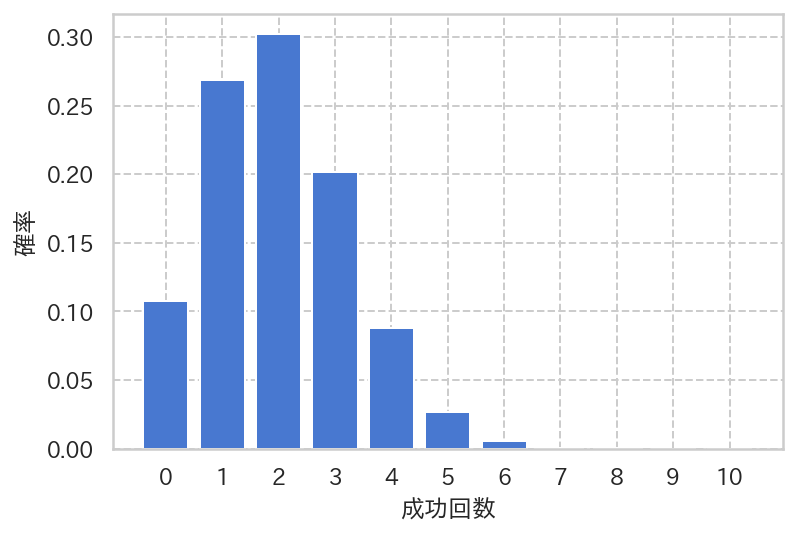

In [8]:
plt.bar(binomial_prob.keys(), binomial_prob.values())
plt.xticks(range(11))
plt.xlabel("成功回数")
plt.ylabel("確率")
plt.show()

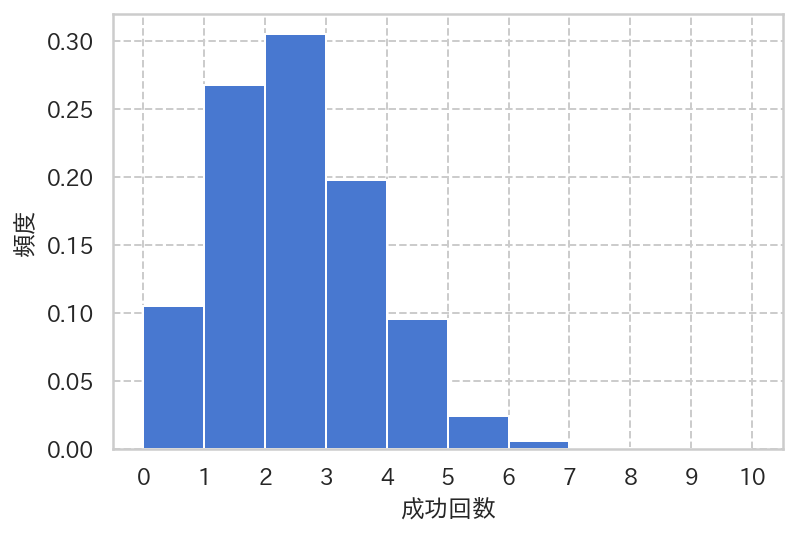

In [9]:
# コード9: 二項分布のシミュレーション
from scipy.stats import bernoulli
np.random.seed(71)
# ベルヌーイ分布に従う乱数を生成
def gen_bern_var(n, p):
  return np.sum(bernoulli.rvs(p, size=n))

n_trial = 10000
n = 10
p = 0.2
result = []
for i in range(n_trial):
  result += [gen_bern_var(n=n, p=p)]
plt.hist(result, bins=range(n+1),density=True)
plt.xticks(range(n+1))
plt.xlabel("成功回数")
plt.ylabel("頻度")
plt.show()